In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import quandl
from datetime import datetime
from math import ceil

In [2]:
%matplotlib inline

In [3]:
DATA_DIR = 'DATA'
DATA_PATH = DATA_DIR

In [4]:
from scripts import settings as st

In [5]:
# Add your Quandl API key in
# ../settings/settings.py - API_KEY

API_KEY = st.API_KEY

In [6]:
# Adding the API KEY to the Quandl config
quandl.ApiConfig.api_key = API_KEY

In [7]:
from scripts.utils.data import get_quandl_data, format_quandl_data


In [8]:
markets = ["Kraken", "foxbit", "Bitstamp", "itBit"]
currs = ["USD", "BRL", "USD", "USD"]

data = {market:format_quandl_data(market, curr) for market, curr in zip(markets, currs)}

In [9]:
data

{'Bitstamp': 'BCHARTS/BITSTAMPUSD',
 'Kraken': 'BCHARTS/KRAKENUSD',
 'foxbit': 'BCHARTS/FOXBITBRL',
 'itBit': 'BCHARTS/ITBITUSD'}

In [10]:
btc_price = get_quandl_data(data['Kraken'], DATA_PATH)

DATA/BCHARTS-KRAKENUSD-2018-1-4.pkl


In [11]:
btc_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1446 entries, 2014-01-07 to 2017-12-22
Data columns (total 7 columns):
Open                 1446 non-null float64
High                 1446 non-null float64
Low                  1446 non-null float64
Close                1446 non-null float64
Volume (BTC)         1446 non-null float64
Volume (Currency)    1446 non-null float64
Weighted Price       1446 non-null float64
dtypes: float64(7)
memory usage: 90.4 KB


In [12]:
btc_price.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1.446000e+03,1446.000000
mean,1233.524199,1280.976236,1191.662560,1243.558881,1569.008498,4.838766e+06,1237.714636
std,2276.946039,2394.570928,2174.686637,2306.843812,2655.189452,1.222941e+07,2289.237055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,320.000000,325.188430,313.052250,320.405080,13.405933,5.258686e+03,320.799001
50%,566.324480,575.515005,530.761495,562.785510,150.079058,4.635445e+04,561.803065
75%,856.900000,900.218703,827.505000,859.332640,1900.696946,1.575992e+06,855.543890
max,19356.900000,19660.000000,18567.100000,19356.900000,21846.766955,1.155232e+08,19135.469160


In [13]:
btc_price.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [14]:
btc_price.to_csv('bitcoin.csv')

In [15]:
def plot_(df, curr="USD"):
    ax = df[['Close']].plot(title='Close Price', figsize=(16,8))
    
    n_ticks = ceil(btc_price['Close'].max()/1000) + 1
    y_ticks = [y*1000 for y in range(n_ticks)]

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(['0'] + ['{}k'.format(y//1000) for y in y_ticks[1:]])
    ax.set(ylabel=curr)
    
    return ax

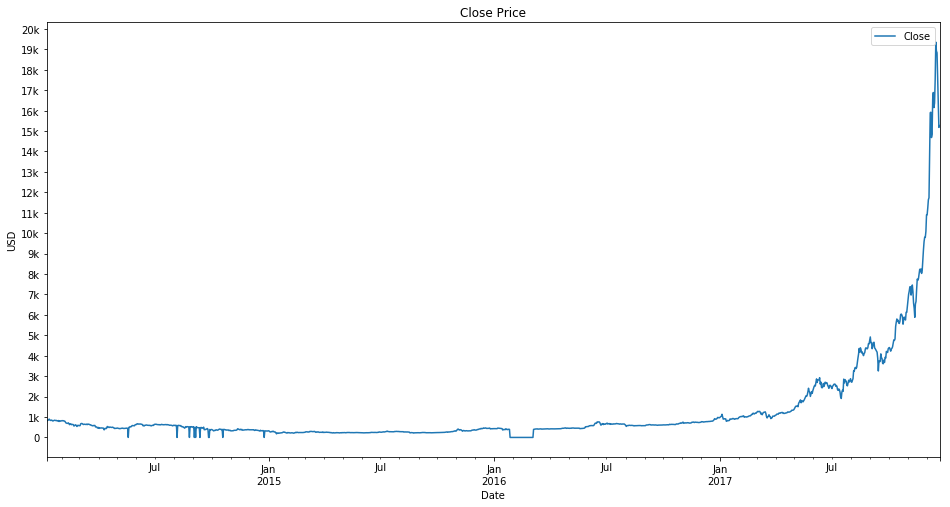

In [16]:
plot_(btc_price)

# Plotting Bollinger Bands

In [17]:
def plot_boll_band(df, k=2, period=20):
    fig, ax = plt.subplots(figsize=(16,8))
    
    df_period_mean = df['Close'].rolling(window=period).mean()
    
    df_upper = df_period_mean + k*(df['Close'].rolling(period).std())
    
    df_lower = df_period_mean - k*(df['Close'].rolling(period).std())
    
    df['Close'].plot(ax=ax)
    df_period_mean.plot(ax=ax)
    df_upper.plot(ax=ax)
    df_lower.plot(ax=ax)
    
    return ax

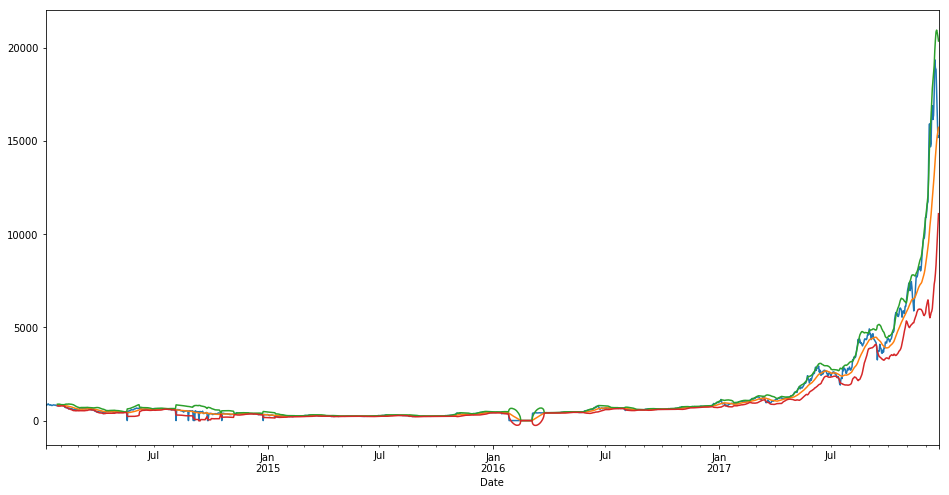

In [18]:
plot_boll_band(btc_price)

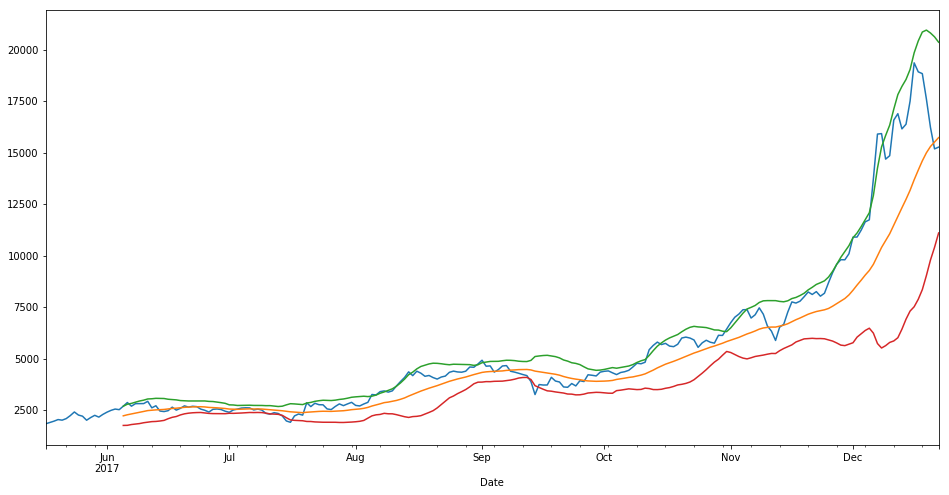

In [19]:
# Check only last 200 days of time series
plot_boll_band(btc_price.tail(220))